<a href="https://colab.research.google.com/github/Coding-bot007/Exploratory_Data_Analysis_-Capstone/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#FF3206'>**Project Name**    - <font color='#3792cb'>Zomato Restaurant Clustering and Sentiment Analysis



##### <font size='5px'>**Project Type**    - **UnSupervised Machine Learning**
##### **Contribution**    - Individual

# **Project Summary -**

This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, average cost for two, ratings, and user reviews.

Subsequently, I embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step in the project was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included the restaurant's location, cuisines, and average cost for two. The number of clusters was determined by utilizing the elbow method.

I then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral. Additionally, I extracted the most recurrent words utilized in the reviews and visualized them through the creation of word clouds.

The outcome of the analysis revealed that the restaurants within the city were grouped into five clusters based on their location, cuisines, and average cost for two. The sentiment analysis uncovered that, generally, customers held a positive sentiment towards the restaurants.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# **GitHub Link -**

**Link to Repository :** https://github.com/abhinav4201/captsone_4_UnSupervised-ML-Zomato-Restaurant-Clustering-and-Sentiment-Analysis

# **Problem Statement**


The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization
from sklearn.decomposition import NMF


from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA


#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#LDA
!pip install pyLDAvis
import pyLDAvis
from sklearn.decomposition import LatentDirichletAllocation

#importing contraction
!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

#importing shap for model explainability
!pip install shap
import shap

#download small spacy model
# !python -m spacy download en_core_web_sm
# import spacy

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       dat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Dataset Loading

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
hotel_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look restaurant
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# Dataset First Look review
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation and feature for restaurant: {hotel_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


### Dataset Information

In [ ]:
# Dataset Info
print('Restaurant Info')
print('\n')
hotel_df.info()
print('='*120)
print('\n')
print('Review Info')
print('\n')
review_df.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('For Restaurant')
print('\n')
print(f"Data is duplicated ? {hotel_df.duplicated().value_counts()},unique values with {len(hotel_df[hotel_df.duplicated()])} duplication")
print('\n')
print('='*120)
print('\n')
print('For Reviews')
print('\n')
print(f"Data is duplicated ? {review_df.duplicated().value_counts()},unique values with {len(review_df[review_df.duplicated()])} duplication")

For Restaurant


Data is duplicated ? False    105
dtype: int64,unique values with 0 duplication




For Reviews


Data is duplicated ? False    9964
True       36
dtype: int64,unique values with 36 duplication


In [ ]:
#getting duplicate values
print(f' Duplicate data count = {review_df[review_df.duplicated()].shape[0]}')
review_df[review_df.duplicated()]

 Duplicate data count = 36


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
#checking values for Anerican Wild Things
review_df[(review_df['Restaurant'] == 'American Wild Wings')].shape

(100, 7)

In [ ]:
#checking values for Arena Eleven
review_df[(review_df['Restaurant'] == 'Arena Eleven')].shape

(100, 7)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count for hotel data
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Missing Values/Null Values Count for review data
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

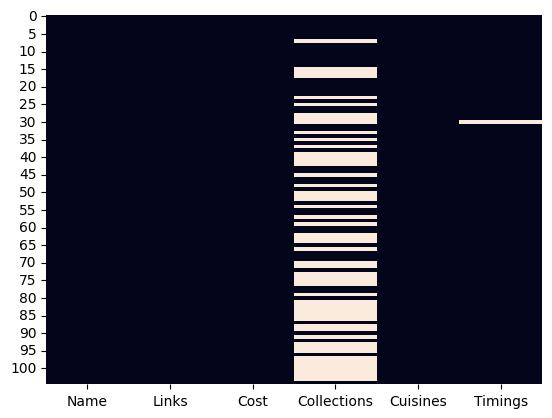

In [ ]:
# Visualizing the missing values for restaurant
# Checking Null Value by plotting Heatmap
sns.heatmap(hotel_df.isnull(), cbar=False);

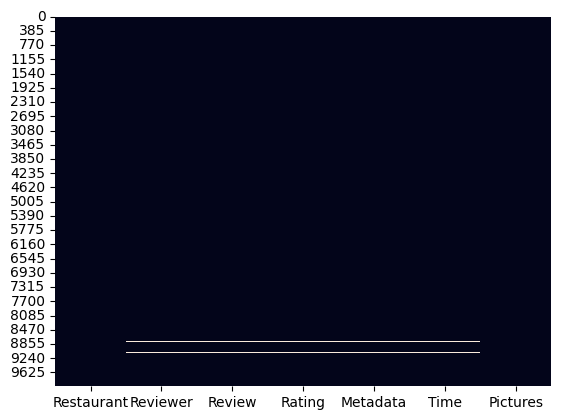

In [ ]:
# Visualizing the missing values for reviews
# Checking Null Value by plotting Heatmap
sns.heatmap(review_df.isnull(), cbar=False);

### What did you know about your dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns restaurant
print(f'Features : {hotel_df.columns.to_list()}')

Features : ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [ ]:
# Dataset Columns review
print(f'Features : {review_df.columns.to_list()}')

Features : ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [ ]:
# Dataset Describe restaurant
hotel_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [ ]:
# Dataset Describe review
review_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.00,NaN,NaN,NaN,0.75,2.57,0.00,0.00,0.00,0.00,64.00


### Variables Description

**Attributes ▶**

---
**Zomato Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable for restaurant
for i in hotel_df.columns.tolist():
  print("No. of unique values in ",i,"is",hotel_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [ ]:
# Check Unique Values for each variable for reviews
for i in review_df.columns.tolist():
  print("No. of unique values in ",i,"is",review_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#creating copy of both the data
hotel = hotel_df.copy()
review = review_df.copy()

####Restaurant

In [ ]:
#before changing data type for cost checking values
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [ ]:
#top 5 costlier restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [ ]:
#top 5 economy restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

,Name,Cost
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


In [ ]:
#hotels that share same price
hotel_dict = {}
amount = hotel.Cost.values.tolist()

#adding hotel name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = hotel[hotel['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same
#same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
hotel_count = hotel.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [ ]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [ ]:
# spliting the cusines and storing in list
cuisine_value_list = hotel.Cuisines.str.split(', ')

In [ ]:
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [ ]:
# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [ ]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [ ]:
# spliting the cusines and storing in list
Collections_value_list = hotel.Collections.dropna().str.split(', ')

In [ ]:
# storing all the cusines in a dict
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1

In [ ]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [ ]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


####Reviews

In [ ]:
#in order to change data type for rating checking values
review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review.loc[review['Rating'] == 'Like'] = 0
#changing data type for rating in review data
review['Rating'] = review['Rating'].astype('float')

In [ ]:
#since there is one rating as like converting it to median
review.loc[review['Rating'] == 0] = review.Rating.median()

In [ ]:
#changing date and extracting few feature for manipulation

review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])
review['Time']=pd.to_datetime(review['Time'])
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour

In [ ]:
#Average engagement of restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,4.00,4.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [ ]:
#usless data
review[review['Restaurant'] == 4.0]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,4.00,4.00,4.00,4.00,4.00,1970-01-01 00:00:00.000000004,4,NaN,NaN,1970.00,1.00,0.00


In [ ]:
#checking hotel count as total hotel in restaurant data was 105
review.Restaurant.nunique()

101

In [ ]:
#finding hotel without review
hotel_without_review = [name for name in hotel.Name.unique().tolist()
       if name not in review.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [ ]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

,Restaurant,Rating,Total_Review
4,AB's - Absolute Barbecues,4.88,100
12,B-Dubs,4.81,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
68,Paradise,4.70,100
36,Flechazo,4.66,100


In [ ]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

,Restaurant,Rating,Total_Review
42,Hotel Zara Hi-Fi,2.40,100
11,Asian Meal Box,2.58,100
67,Pakwaan Grand,2.71,100
58,Mathura Vilas,2.82,100
15,Behrouz Biryani,2.83,100


In [ ]:
#Finding the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5464,Satwinder Singh,186.00,13410.00,3.67
1702,Eat_vth_me,60.00,13320.00,5.00
5236,Samar Sardar,8.00,11329.00,3.50
1788,Foodies Hyderabad,31.00,9494.00,4.50
6230,Srinivas,34.00,7628.00,3.71


In [ ]:
#finding which year show maximum engagement
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

,Review_Year,Restaurant,Count
0,1970.00,[4.0],1
1,2016.00,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
2,2017.00,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
3,2018.00,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4903
4,2019.00,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4802


In [ ]:
#merging both data frame
hotel = hotel.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9999, 17)

In [ ]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})


In [ ]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.00
11,B-Dubs,4.81,1600.00
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.00
67,Paradise,4.70,800.00
35,Flechazo,4.66,1300.00


In [ ]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.40,400.00
10,Asian Meal Box,2.58,200.00
66,Pakwaan Grand,2.71,400.00
57,Mathura Vilas,2.82,500.00
14,Behrouz Biryani,2.83,600.00


In [ ]:
#rating count by reviewer
rating_count_df = pd.DataFrame(review.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

,Rating_Count
Reviewer,
Parijat Ray,13
Ankita,13
Kiran,12
Vedant Killa,11
Jay Mehta,11


### What all manipulations have you done and insights you found?

Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli	has maximum price of 2800 and then found the lowest which is Amul	 with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of	13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews.

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do  futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distplot for Distribution

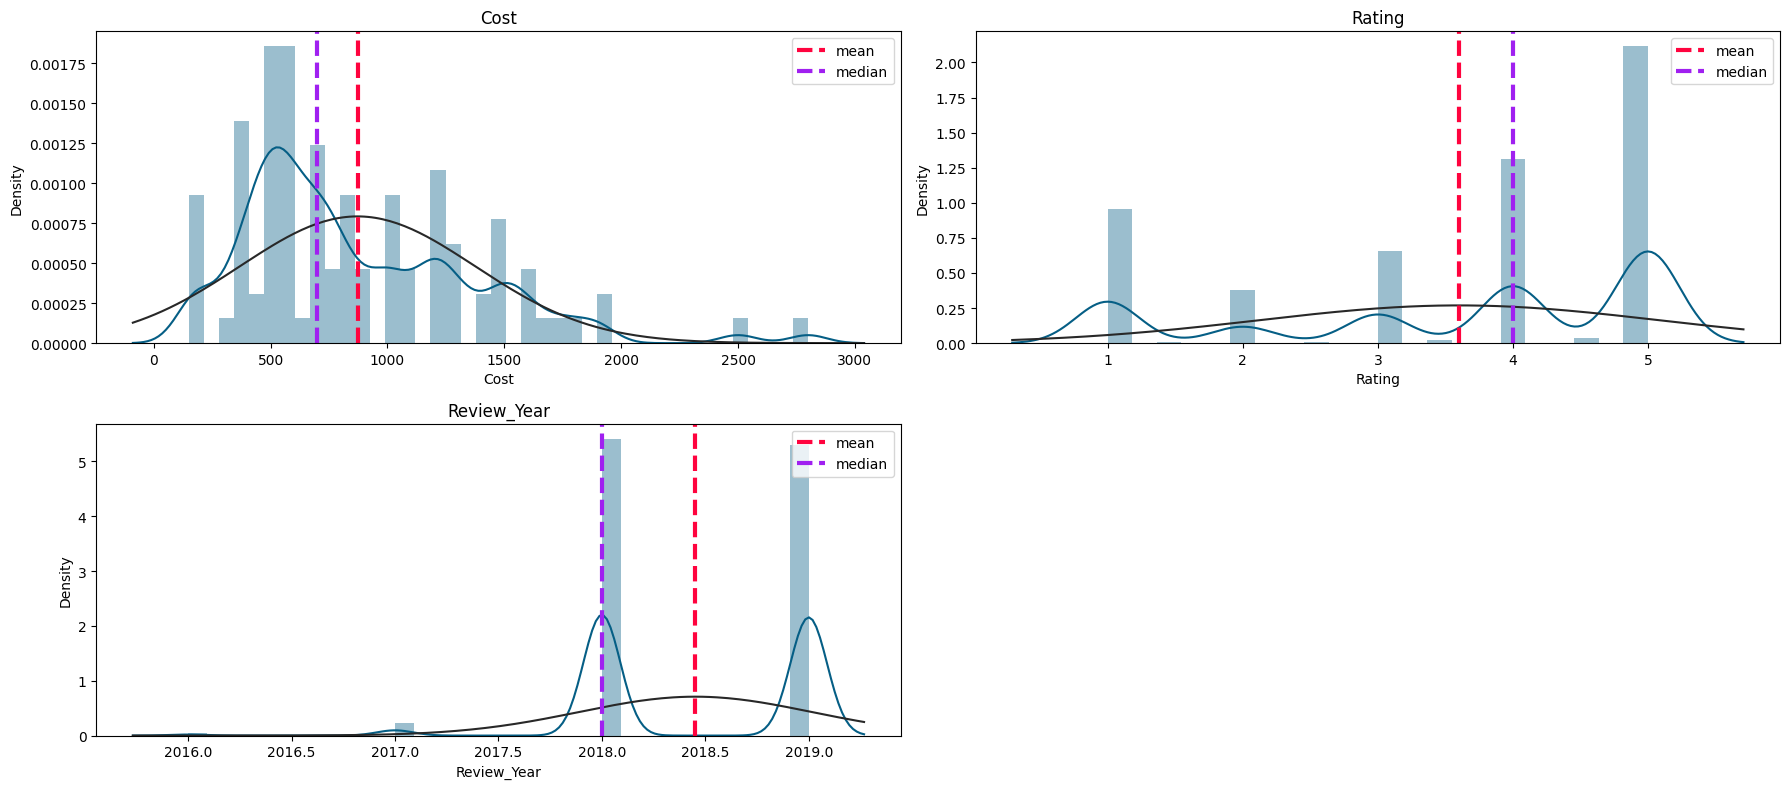

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    #plt.legend(bbox_to_anchor = (1.0, 1), loc = 'up')
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

Distplot is helpful in understanding the distribution of the feature.

##### 2. What is/are the insight(s) found from the chart?

* All three are show skewness.
* Maximum restaurant show price range for 500.
* In 2018 number of reviews are more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Price always place important role in any business alongwith rating which show how much engagement are made for the product.

But in this chart it is unable to figure any impact on business when plotted all alone.

###Price Point and Maximum Engagement

#### Chart - 2 Maximum Engagement and Lowest Engagement

In [ ]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

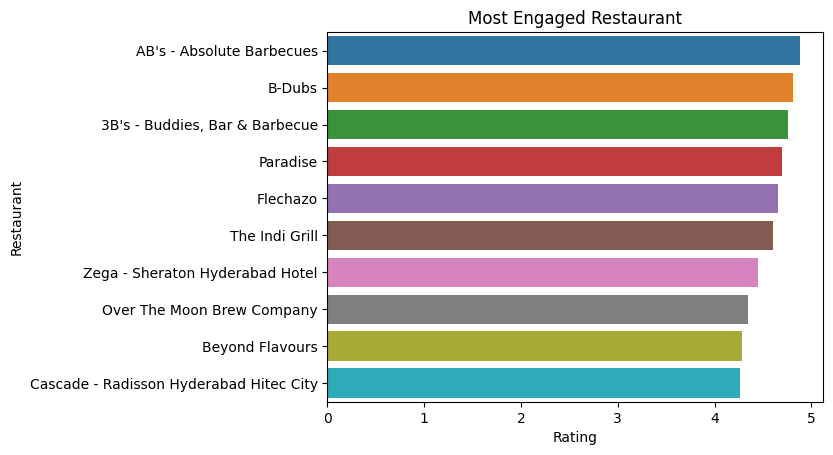

In [ ]:
# Chart - 2 visualization code for most liked
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

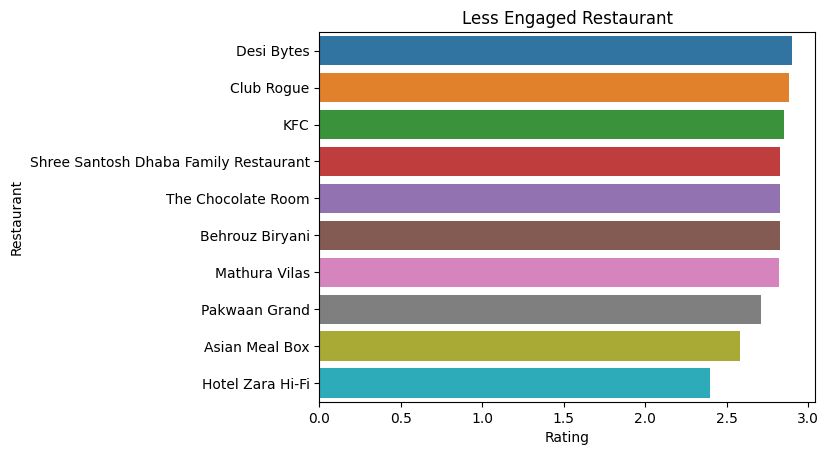

In [ ]:
#chart for less liked hotels
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot for the above graph because it show frequency level for different category.

##### 2. What is/are the insight(s) found from the chart?

AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

Some restaurant show less rating which can show negative growth if not monitored why they recieve less order for example KFC is listed in low rated it is sure they have different outlet and their own outsourcing and lised here because of the popularity of the app and to increase their sale and demand but are not giving 100% dedication to the platform to generate revenue.

#### Chart - 3 Price Point for High Rated and Low Rated Hotels

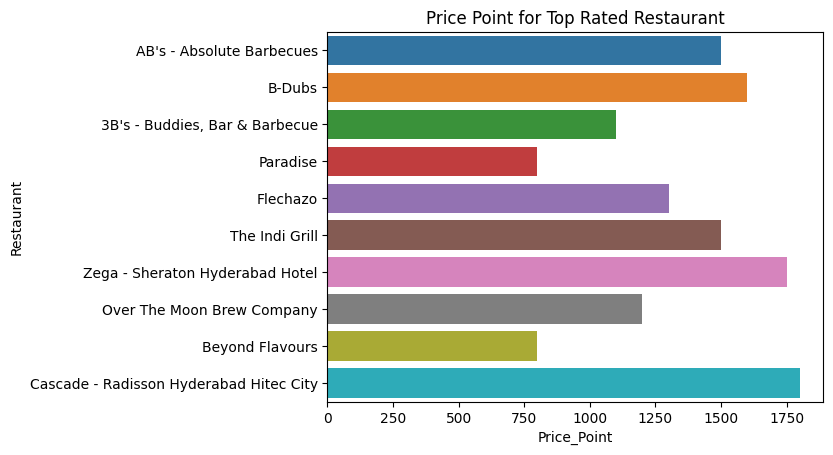

In [ ]:
# Chart - 3 visualization code for price point of high rated restaurant
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

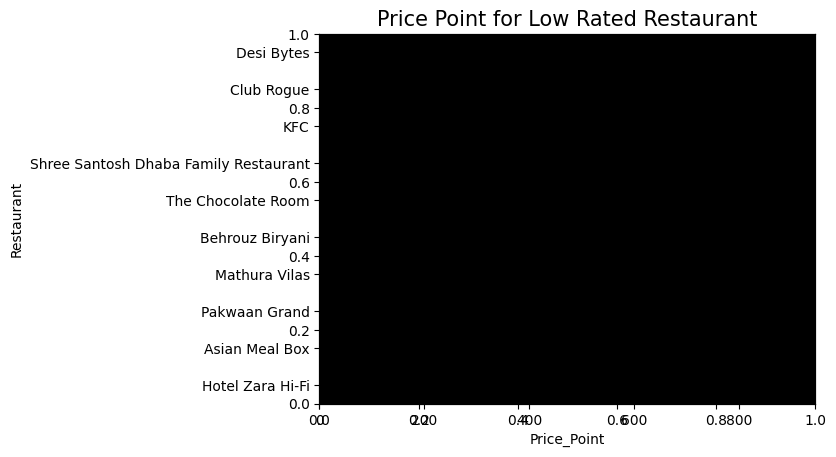

In [ ]:
#visualization code for price point of low rated restaurant
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point',
            y = 'Restaurant',palette = 'hsv')
plt.title('Price Point for Low Rated Restaurant', size = 15)
# Setting the background color of the plot
# using set_facecolor() method
ax = plt.axes()
ax.set_facecolor("black")
plt.show()

##### 1. Why did you pick the specific chart?

Here I choose barplot because bar plot is a good choice for plotting hotel name and price point as it is a simple and effective way to display the comparison of different categories (hotel names) and their corresponding values (price points) on the same chart.
Also, it allow to have a sense of the price range of each hotel and how they compare to each other.

##### 2. What is/are the insight(s) found from the chart?

Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since it is customer centered business i.e., direct to consumer it is important to understand price point which makes this business more affordable for evryone, therefore it is important for business to crack the price point.

Here most liked restaurant has a price point of 1500 which is even though a little high than average but as this business is all about food quality and taste it show maximum engagement which means it serve best quality of food, however deep dive on analysing review text can exactly give why this price point is prefered most.

Some restaurant with lowest rating even with low price point is not making engagement, this may create a negative impact on business.

However it can not be finalized that this hotel should unlisted as there may be chance of different cuisine they both serve and it also depend upon the locality they both serve, therefore based on that small promotional offers can also be given for low rated restaurant to increase sales.

###Commoditized Cuisine

#### Chart - 4 Proportion of Cuisine Sold by Most Restaurant

In [ ]:
#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

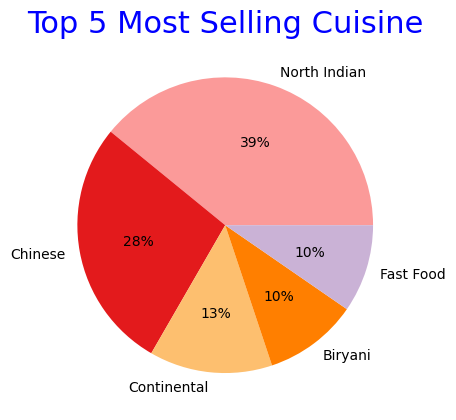

In [ ]:
# Chart - 4 visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

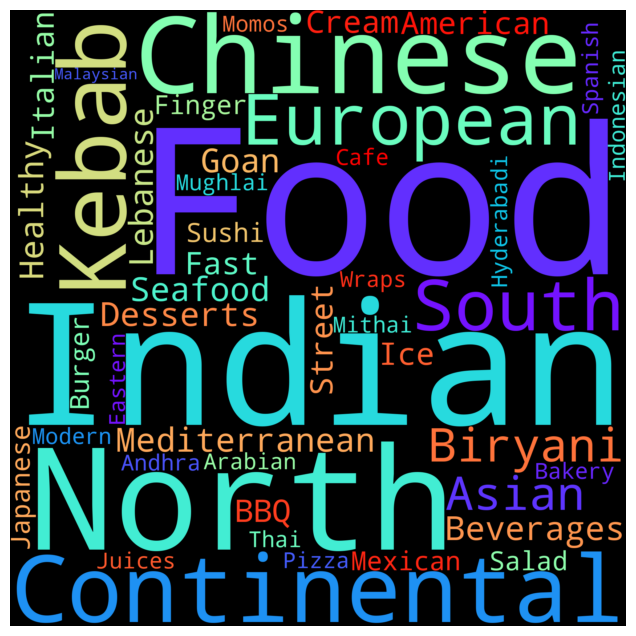

In [ ]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");



---
Aternate way to do the same tast


In [ ]:
# #creating variable to store restaurant and cuisine from hotel dataset
# cproduct = hotel[['Restaurant','Cost',	'Cuisines']].copy()
# #splitting cuisines
# cproduct['Cuisines'] = cproduct['Cuisines'].str.split(',')
# #exploding the cuisine list from above to separate row
# cproduct = cproduct.explode('Cuisines')
# #removing trailing spaces
# cproduct['Cuisines'] = cproduct['Cuisines'].apply(lambda x: x.strip())
# #grouping cuisines and then making list of restaurants
# cprod = cproduct.groupby('Cuisines')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
# # cproduct['Cuisines'].unique()
# cprod['Restaurant_Count'] = cprod['Restaurant'].apply(lambda x: len(x))
# cprod[cprod['Restaurant_Count']==1].sort_values('Restaurant_Count', ascending = False)

##### 1. Why did you pick the specific chart?

Here I choose to use pie chart because it show proportion of each quantity and used wordcloud because it show all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

Based on the above chart it is clear that most of the hotel sold North Indian food followed by chinese.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the Commoditized Cuisine plays an important role as it helps in identifying the challenge or Competitive Advantage i.e., Knowing which cuisines are commoditized allows a restaurant or food business to differentiate themselves from their competitors by offering unique and non-commoditized options.  

If a cuisine is commoditized, the prices for ingredients and labor for that cuisine may be higher than for non-commoditized cuisines. Identifying these commoditized cuisines can help a business to control costs by focusing on non-commoditized options or finding ways to lower the cost of commoditized items.

Identifying commoditized cuisines can also provide insight into consumer preferences, which can be used to make informed decisions about menu offerings, pricing, and promotions.

Plotting a pie chart of cuisine types can help to identify the most popular cuisine types among its customers. This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as the significant portion of customers are searching for north indian restaurants, Zomato could focus on adding more north indian restaurants to its platform and promoting them to customers.

Similarly, a word cloud of cuisine can help Zomato identify the most frequently mentioned cuisine types in customer reviews. This can provide insight into which cuisines are most popular and well-regarded among customers, and which cuisines may need improvement.

However, these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain cuisine is popular does not tell us about the profitability of that cuisine or the competition in that category. The same goes for word cloud, it only shows us the frequency of the cuisine mentioned, it can not tell us if the mentions are positive or negative.

Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, it's important for Zomato to consider other data and information when making strategic decisions.

#### Chart - 5 Most used Tags

In [ ]:
#list of all collection
collection_list = Collections_df.sort_values('Number of Restaurants',
                          ascending = False)['Tags'].tolist()[:5]

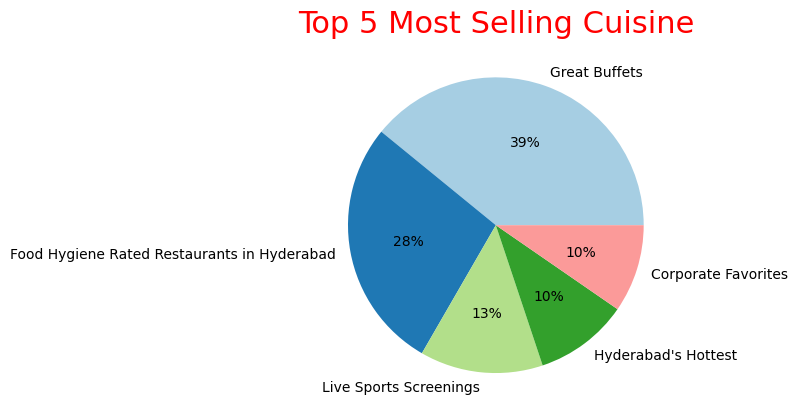

In [ ]:
# Chart - 5 visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'red')
plt.show()

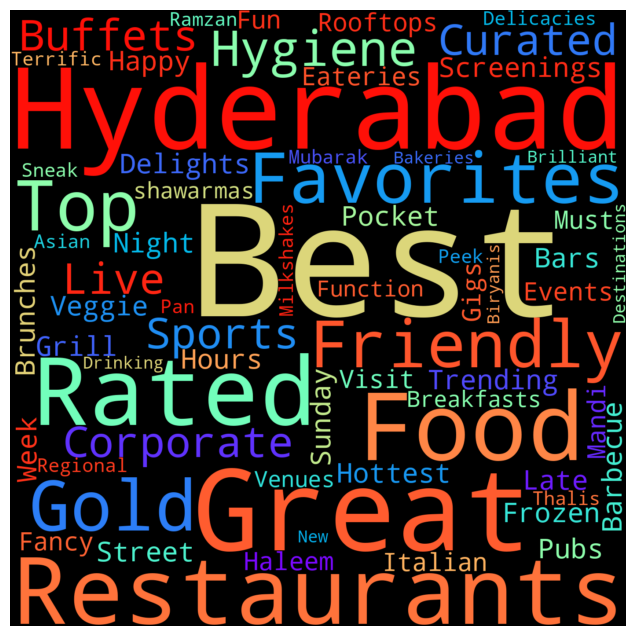

In [ ]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in Collections_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False,
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

The pie chart provides a clear and simple way to see the proportion of different food attributes, making it easy to identify the most popular attributes and compare them to one another. It also allows for a quick comparison of the popularity of different attributes, and can be useful in identifying patterns or trends in the data.

On the other hand, a word cloud displays the most frequently mentioned attributes in a way that is visually striking and easy to understand. It is useful for identifying the most frequently mentioned attributes and can be used to quickly identify patterns and trends in customer reviews.

Both charts, when used together, can provide a comprehensive understanding of customer reviews and can be used to identify customer preferences, which can help Zomato to make strategic decisions to improve their business.

##### 2. What is/are the insight(s) found from the chart?

Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Plotting a pie chart of tags used to describe food can help a restaurant review and food delivery platform Zomato to identify the most popular adjectives used to describe the food. This information can be used to make strategic decisions about which food attributes to focus on promoting and expanding. For example, if a significant portion of customers are describing the food as "delicious" or "fresh", Zomato could focus on adding more restaurants that are known for their delicious and fresh food and promoting them to customers.

Similarly, a word cloud of tags used to describe food can help Zomato identify the most frequently mentioned food attributes in customer reviews. This can provide insight into which attributes are most popular and well-regarded among customers, and which attributes may need improvement.

However, it's important to note that these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain adjective is popular does not tell us about the profitability of that adjective or the competition in that category. The same goes for word cloud, it only shows us the frequency of the adjective mentioned, it can not tell us if the mentions are positive or negative.

Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, it's important for Zomato to consider other data and information when making strategic decisions.
Also, it's important to note that the data used for creating these charts should be cleaned and validated, as the results may be biased if the data is not accurate or complete.

###Most Popular Critics

#### Chart - 6 Learn about Reviewers

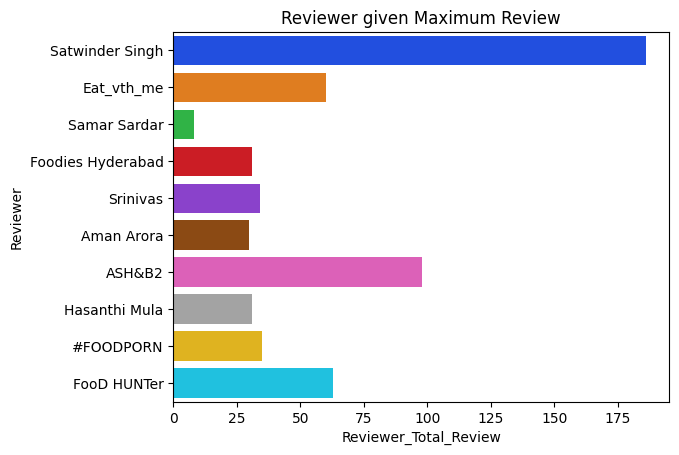

In [ ]:
# Chart - 6 visualization code for most review
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

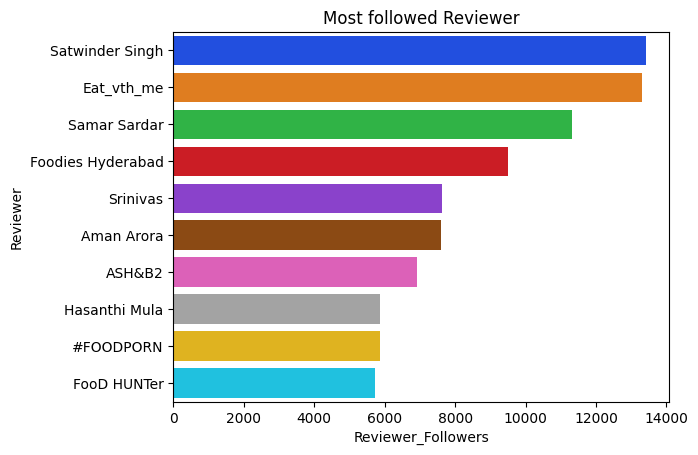

In [ ]:
# visualization code for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers',
            y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

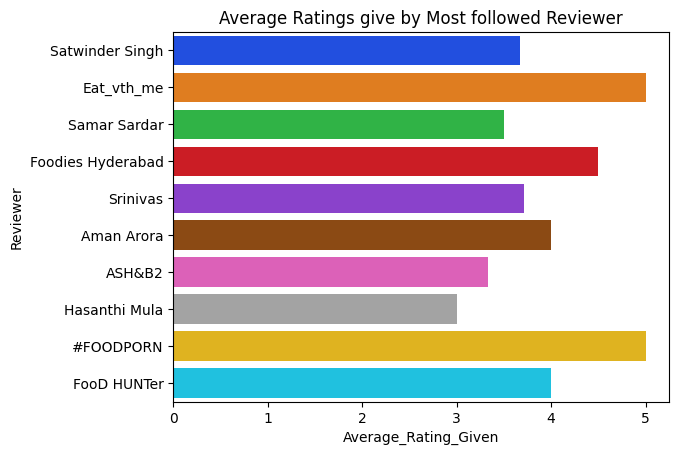

In [ ]:
# visualization code for average rating given by most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given',
            y = 'Reviewer',palette='bright')
plt.title('Average Ratings give by Most followed Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps in understanding the frequency of rating, follower and total reviews with respect to reviewer.
Plotting total review, average reviewer rating, and total follower allows to see the correlation between these variables and how they relate to one another for each reviewer. It can also give insight on how reviewers with more followers tend to get more reviews, how their ratings tend to be, etc.

##### 2. What is/are the insight(s) found from the chart?

Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.

It's important to note that this chart does not provide all the information about the business, and can not be the only decision making factor. However it can help on promotions food based on reviews.

###Most Expensive Restaurant

#### Chart - 7 Hotel with Highest Price and Lowest Price

In [ ]:
#extracting name and price

price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]

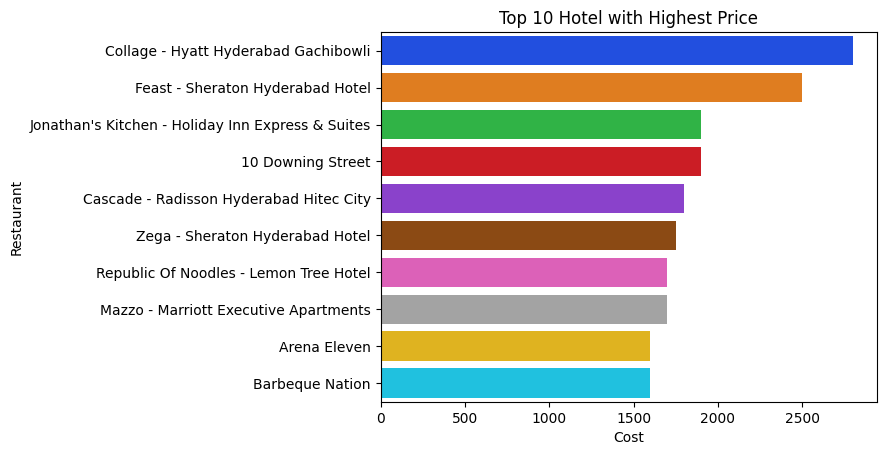

In [ ]:
# Chart - 7 visualization code for howtel with maximum price
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Hotel with Highest Price')
plt.show()

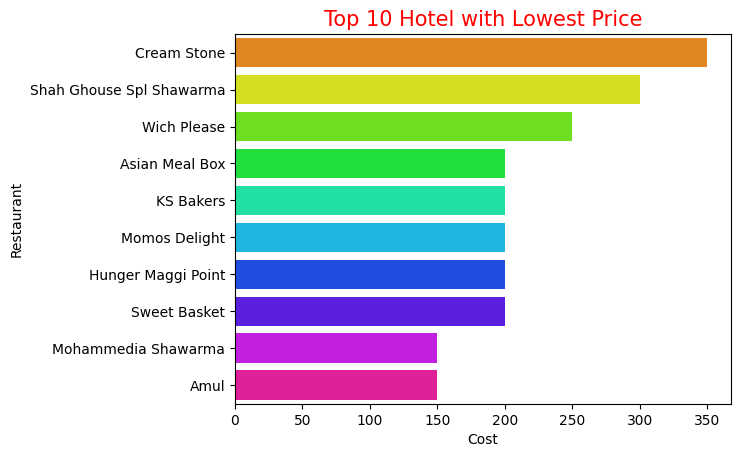

In [ ]:
#hotel with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()

In [ ]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')
#calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']


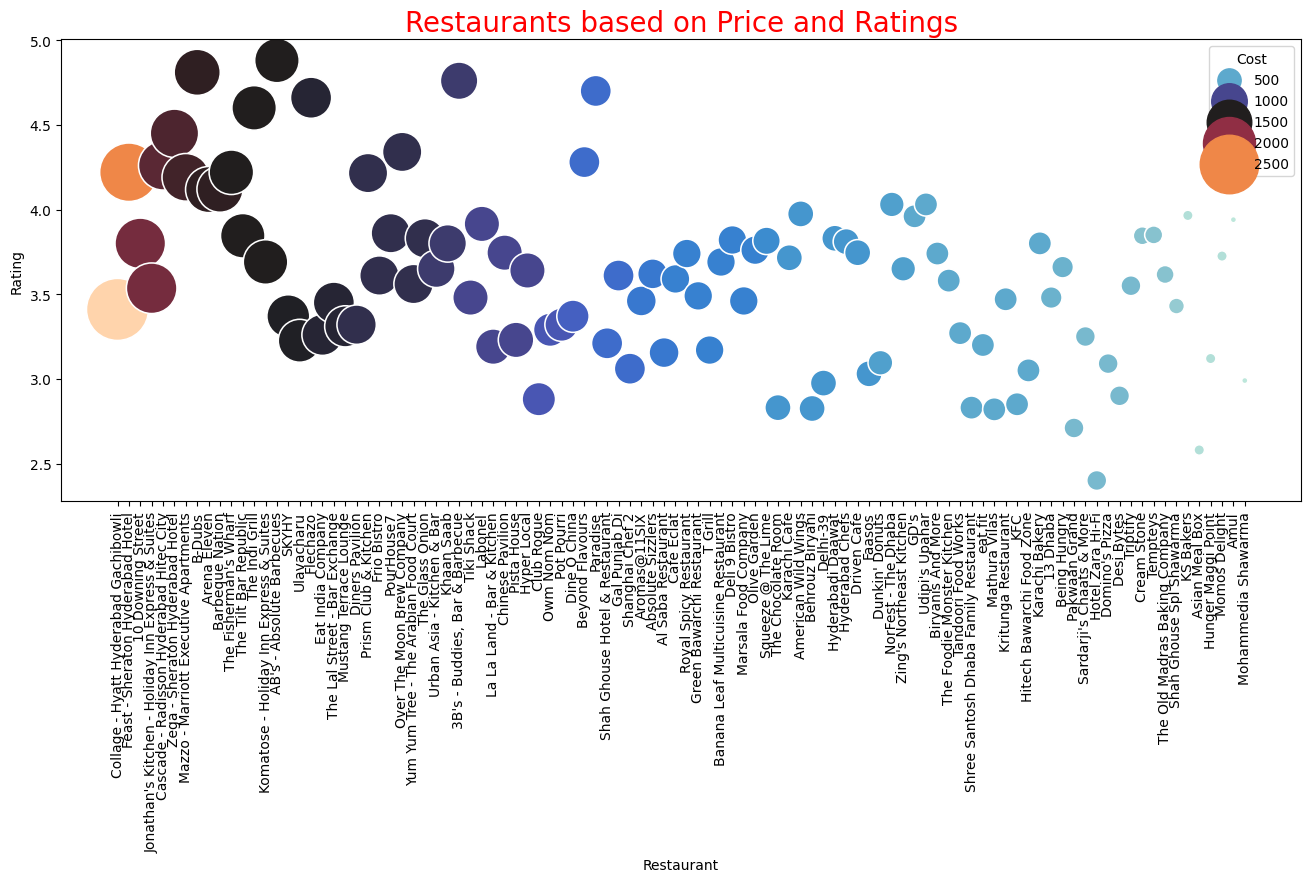

In [ ]:
#chart for rating based on price and hotel
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost",
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

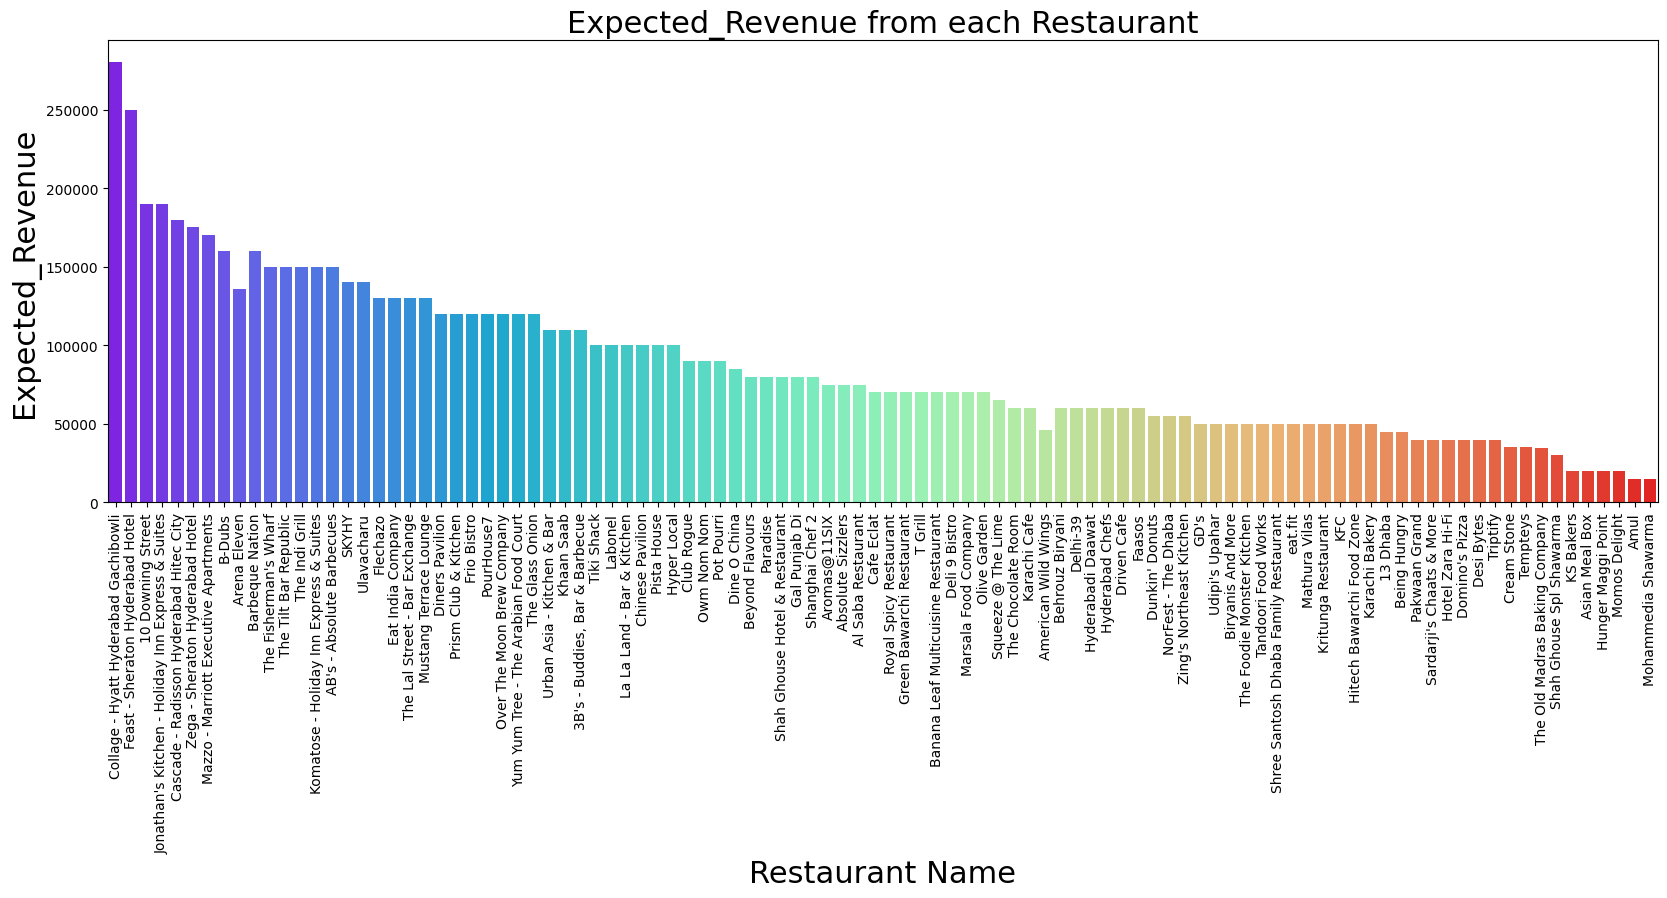

In [ ]:
#chart to understand expected revenue
fig = plt.figure(figsize=[20,6])
sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plt.title("Expected_Revenue from each Restaurant", size = 22)
plt.xlabel('Restaurant Name', size = 22)
plt.xticks(rotation=90)
plt.ylabel('Expected_Revenue', size = 22)
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps in plotting the frquency of cost for each hotel.

##### 2. What is/are the insight(s) found from the chart?

Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating.

Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most expensive product are always center of attraction for a niche market (subset of the market on which a specific product is focused) at the same time for a business purpose, this product are preffered to be most revenue generating market.

Definetly for food delivery platform Zomato, it is very important to focus and improve sales based on these hotels.

Based on the average rating of 3.4 these product should increase their engagement as this may cause negative brand impact. However true behaviour can only be inspected through analysing of reviews.

### Chart - 8 - Correlation Heatmap

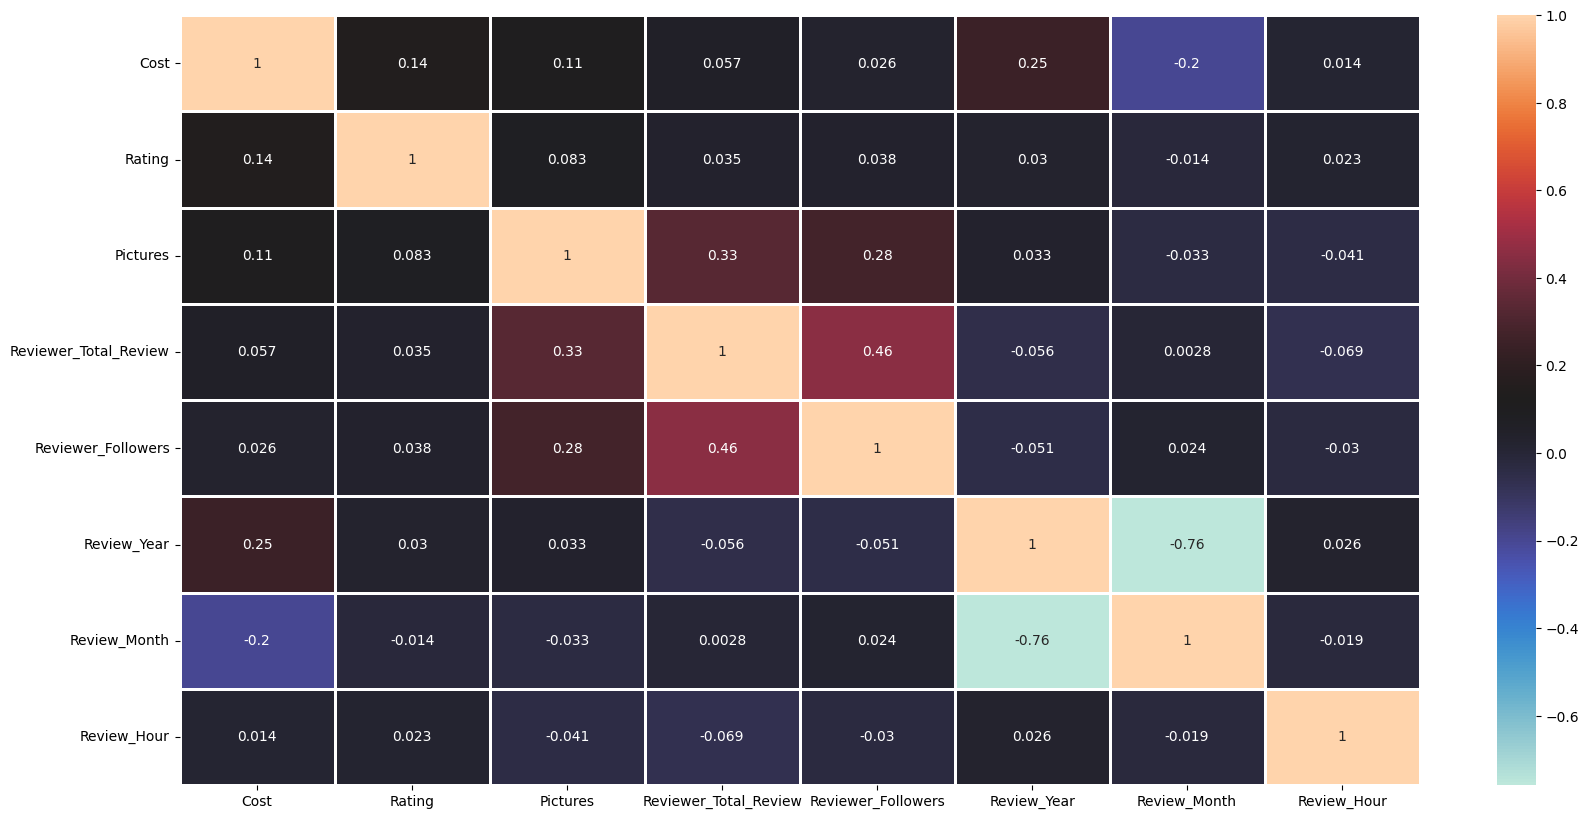

In [ ]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, it can be depicted that few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.

Rest all correlation can be depicted from the above chart.


### Chart - 9 - Pair Plot

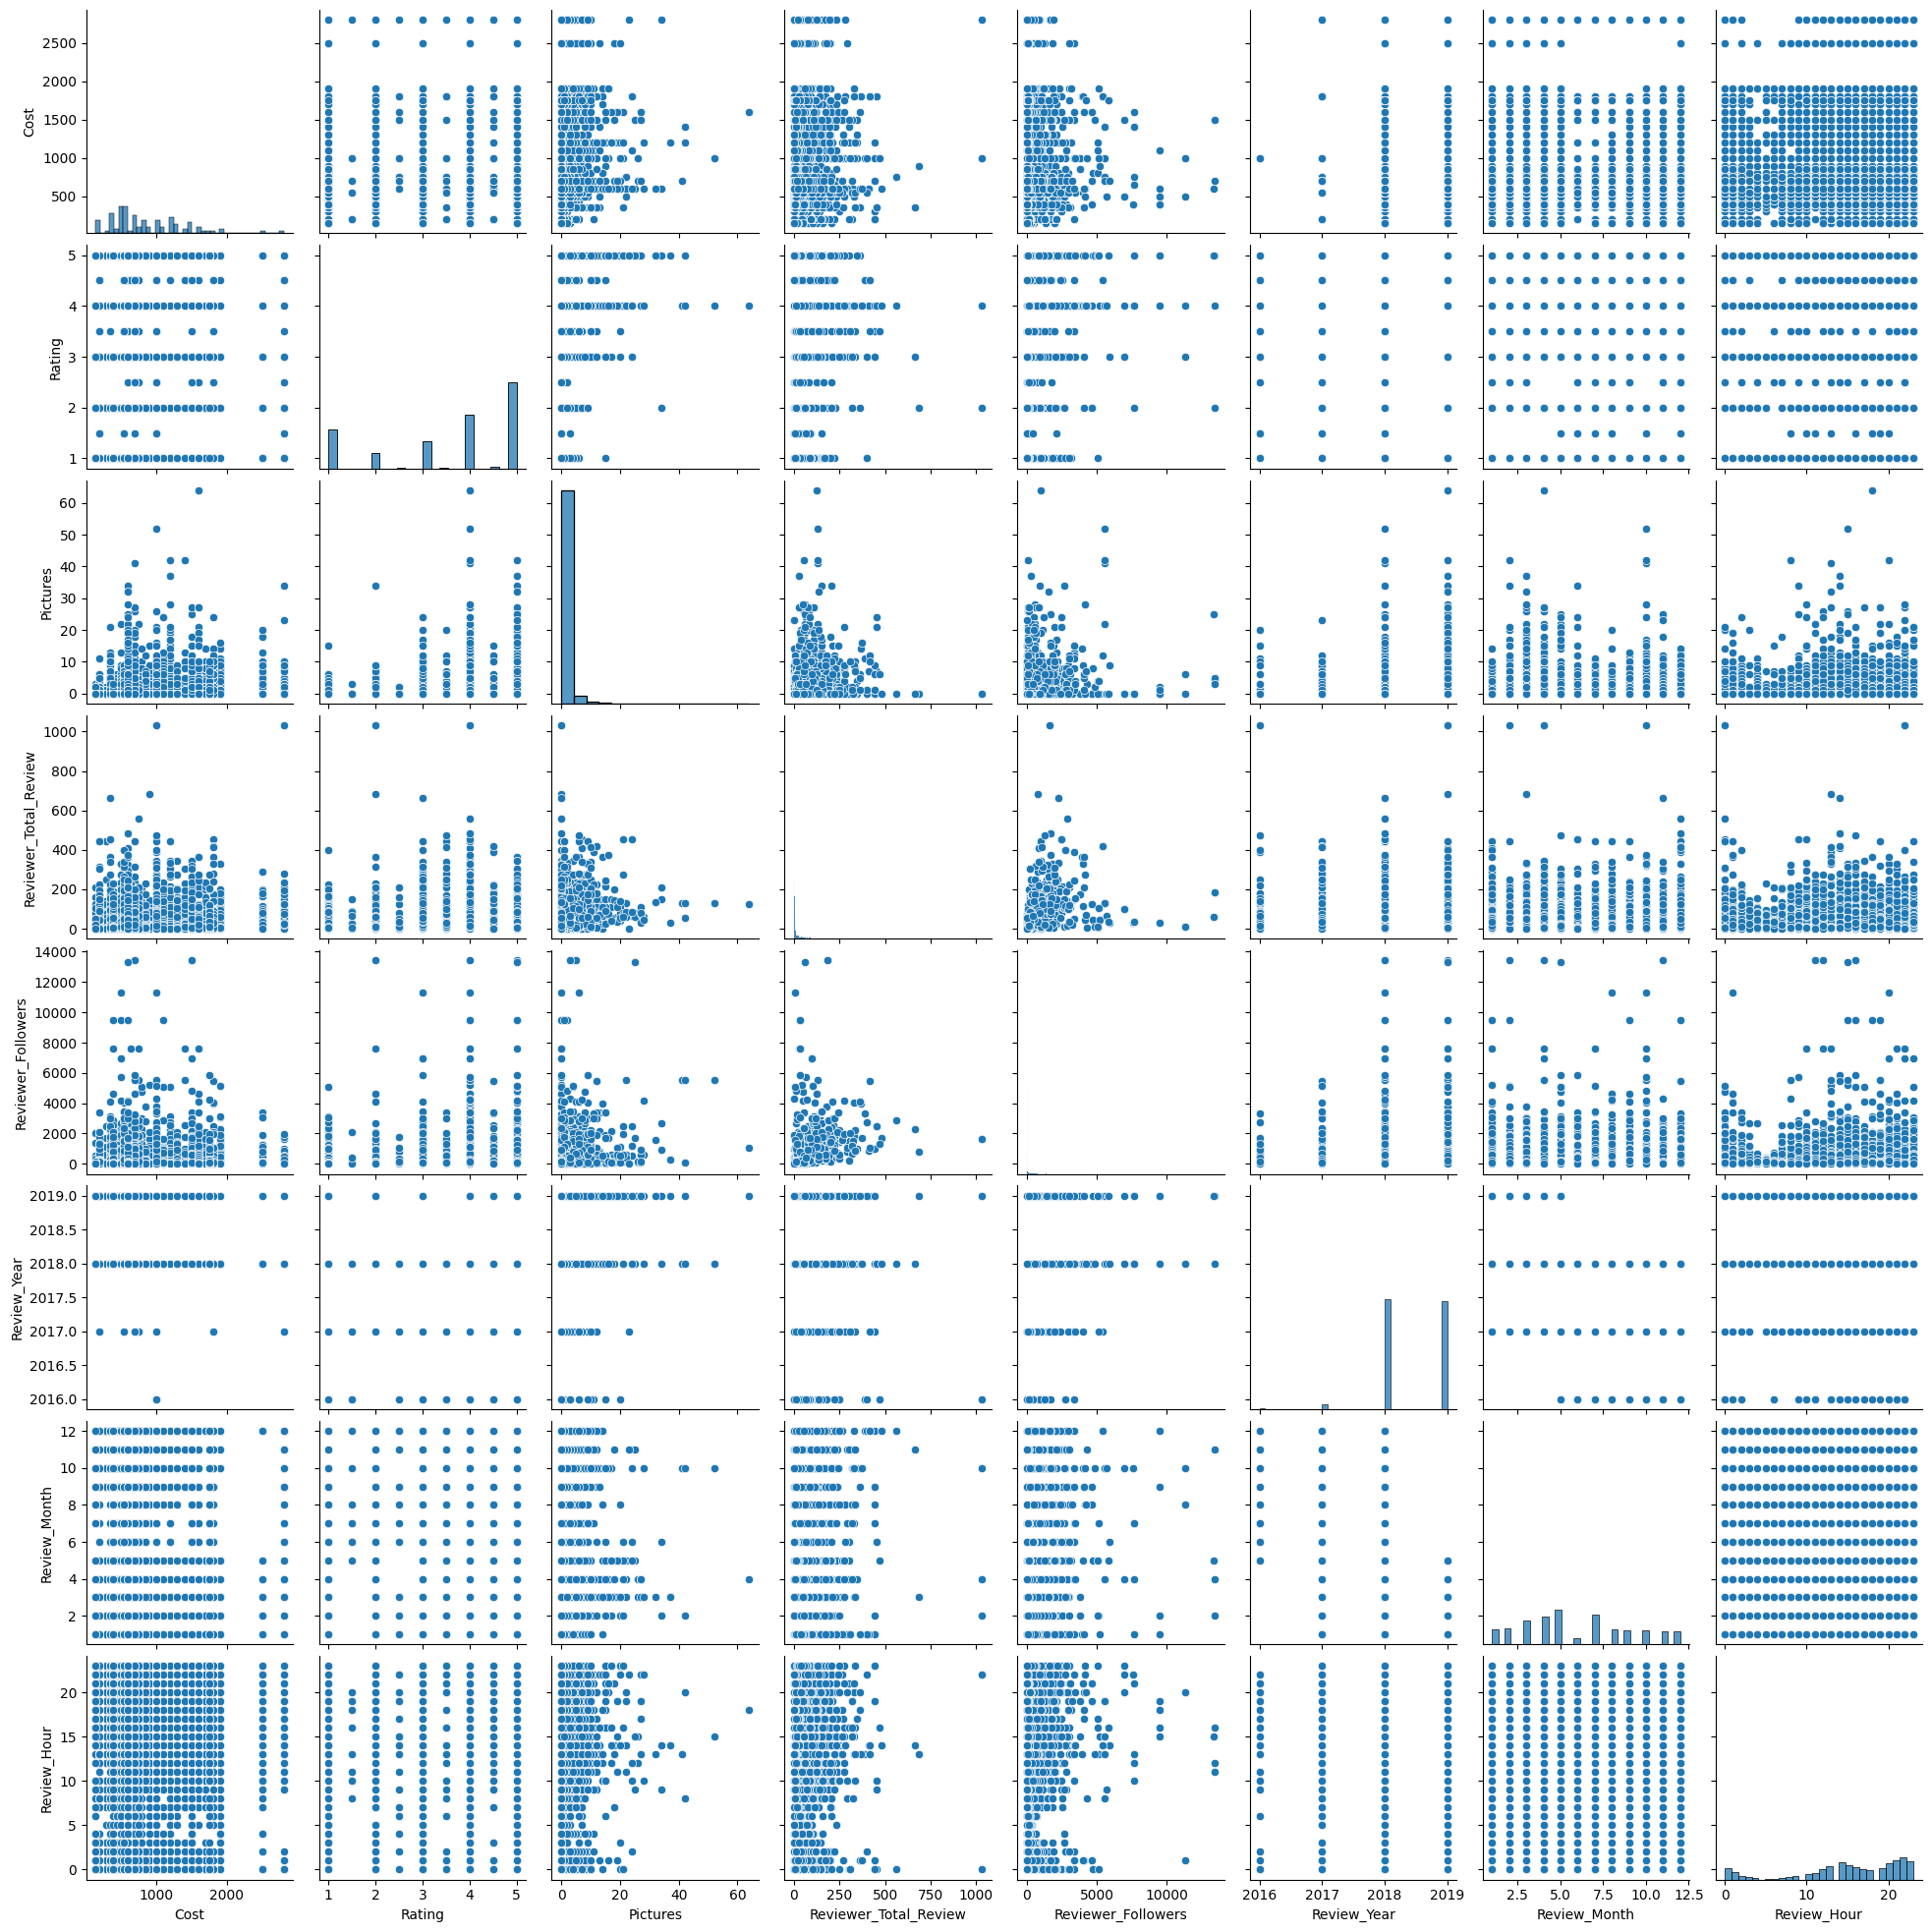

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged);

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged dataframe.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The cost of a restaurant is positively correlated with the rating it receives.
* Restaurants that are reviewed by reviewers with more followers will have a higher rating.
* Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1

---

The cost of a restaurant is positively correlated with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

---
Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0)
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the second hypothesis, I have used Simple Linear Regression Test.

##### Why did you choose the specific statistical test?

I choose this test because it is a straightforward method for testing the relationship between two continuous variables. It assumes that there is a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating) and it allows us to estimate the strength and direction of that relationship. It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable.

### Hypothetical Statement - 3

---

Restaurants that offer a wider variety of cuisines will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88


In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

 I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

####Treating Duplicates

* Since all the duplicated data has NaN values, hence dropping the entire values as it will not help and will create unnecessary noise.

In [ ]:
#deleting duplicate value from review dataset
review = review.drop_duplicates()

In [ ]:
#final check after dropping duplicates
print(f"Anymore duplicate left ? {review.duplicated().value_counts()}, unique values with {len(review[review.duplicated()])} duplication")

Anymore duplicate left ? False    9964
dtype: int64, unique values with 0 duplication


####Treating Missing Values

Restaurant Dataset

---



In [ ]:
# Handling Missing Values & Missing Value Imputation
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
#checking the null value in timing
hotel[hotel['Timings'].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [ ]:
#filling null value in timings column
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)

In [ ]:
#checking null values in Collections
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [ ]:
#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)

In [ ]:
#final checking of missing value
hotel.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64



---

Review Dataset

In [ ]:
#review missing value
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       3
Reviewer_Followers       1581
Review_Year                 2
Review_Month                2
Review_Hour                 2
dtype: int64

In [ ]:
#checking null reviewer
review[review['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking null Reviewer_Total_Review
review[review['Reviewer_Total_Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,4.00,4.00,4.00,4.00,4.00,1970-01-01 00:00:00.000000004,4,NaN,NaN,1970.00,1.00,0.00
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [ ]:
#again checking the remaining values
null_counts = [(x, a) for x, a in review.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Review', 7), ('Reviewer_Followers', 1578)]

In [ ]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [ ]:
# final checking null values
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64

In [ ]:
#merging both dataset
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I started treating missing values by first removing the duplicate data where all other values were NaN or null values except had restaurant name, so instead of replacing each null value I removed it as it was only 36 duplicate data which had no unique identity.

Dataset that contains details about hotel, had 1 null value in timing feature and more than 50% null value in collection feature. In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset tha has details of reviewer had Reviewer             -       2,
Review               -       9,
Rating               -       2,
Metadata             -       2,
Time                 -       2,
Reviewer_Total_Review-       3,
Reviewer_Followers   -    1581,
Review_Year          -       2,
Review_Month         -       2,
Review_Hour          -       2.
On analysing I found that feature like reviewer and reviewer total review had all null values, therefore I removed those two columns which made null values in other feature to zero except in review and reviewer followers columns. Since review was textual data, I changed those 7 null values to 'no review' and reviewer followers to 0 as follower is the meta data for reviewer and it can be 0.

And thus all the null values were treated, at the end I then again merged both the dataset hotel and review dataset.

### 2. Handling Outliers

####Detecting Anamoly

In [ ]:
#Anamoly detection
from sklearn.ensemble import IsolationForest
#checking for normal distribution
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


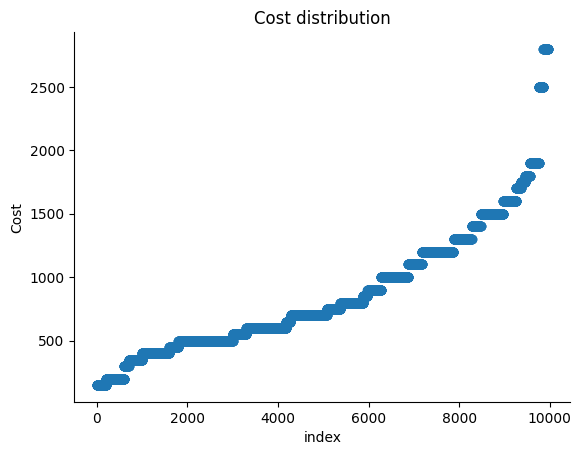

In [ ]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()


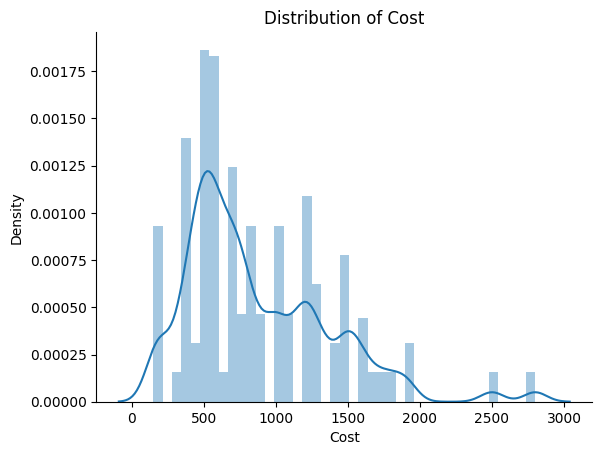

In [ ]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

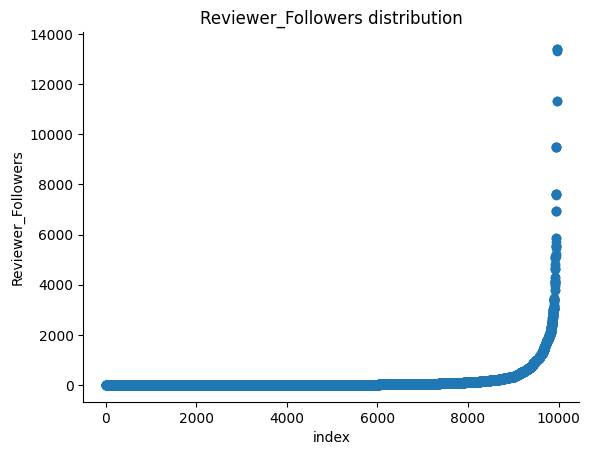

In [ ]:
#plot for reviewer follower
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

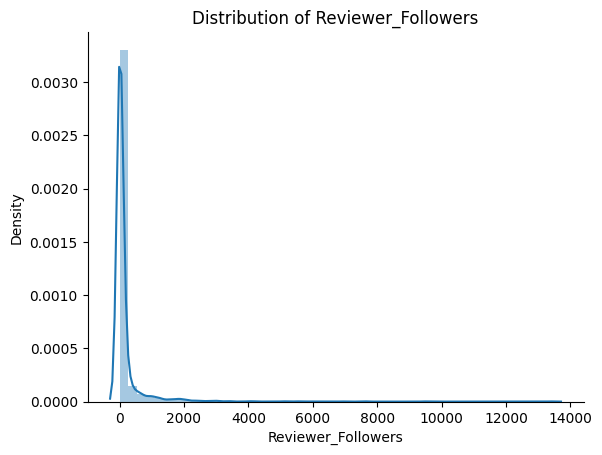

In [ ]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

In [ ]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

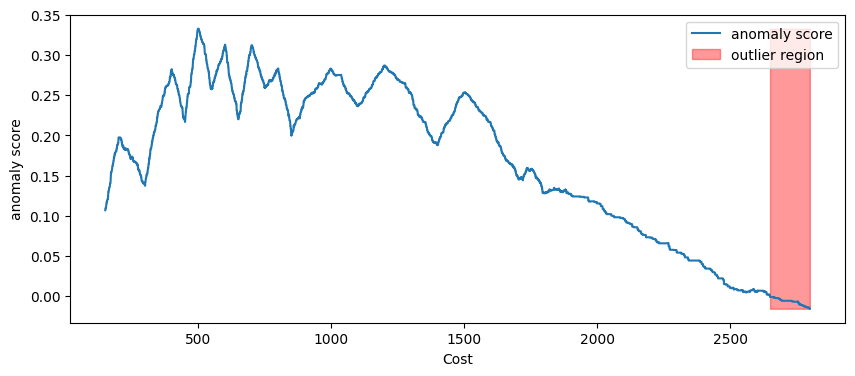

In [ ]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [ ]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))


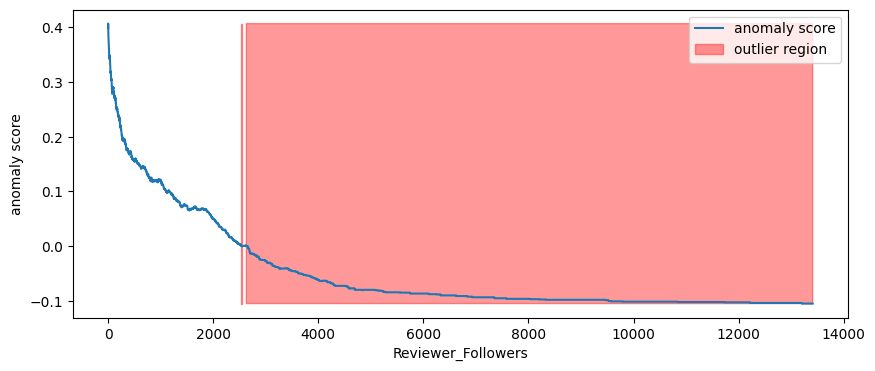

In [ ]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

####Treating Outlier

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().columns:
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']


In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

#upper limit capping
hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]

In [ ]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

#upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]

In [ ]:
#dropping the columns created while outliers treatment
merged.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost',
  'anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

#### What all outlier treatment techniques have you used and why did you use those techniques?

Since cost and reviewer follower feature or column show positive skewed distribution and using isolation forest found they have outliers, hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.



### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [ ]:
#total cuisine count
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28


In [ ]:
#adding cost column to the new dataset
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [ ]:
cluster_dummy.shape

(100, 48)



---

Alternate Method for creating dummies

In [ ]:
#creating data frame for categorial encoding
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [ ]:
#creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [ ]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [ ]:
#result from encoding
cluster_df.head(2).T

,0,1
Restaurant,Beyond Flavours,Paradise
Cuisines,"Chinese, Continental, Kebab, European, South I...","Biryani, North Indian, Chinese"
Cost,800.00,800.00
Average_Rating,4.28,4.70
Total_Cuisine_Count,6.00,3.00
Chinese,1,1
Continental,1,0
Kebab,1,0
European,1,0
South Indian,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding on the cuisine category and based on the cuisine if present i gave value to 1 and if absent gave value of 0.
Benefit of using one hot encoding:

* Handling categorical variables with no ordinal relationship:
> One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

* Handling categorical variables with many unique values
> One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels
> One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

* Handling categorical variables with missing values
> One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability
> One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models
> One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

### 4. Textual Data Preprocessing - Review
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

,Reviewer,Restaurant,Rating,Review
6338,Praju.pn,Dine O China,1.00,Oh terrible pan fried noodles.. so salty and n...
9082,Srichandra Chilappagari,Arena Eleven,3.00,Went here on a Saturday night. Decent ambience...


In [ ]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
1390,1390,Manojkumar D Nambisan,The Lal Street - Bar Exchange,4.00,Good food options and decent service. Is expen...
7233,7233,Ashish Choudhury,Labonel,5.00,Love their chocolate brownies and red velvet c...


In [ ]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [ ]:
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.00,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.00,ambience is too good for a pleasant evening. s...
2,2,Ashok Shekhawat,Beyond Flavours,5.00,a must try.. great food great ambience. thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.00,soumen das and arun was a great guy. only beca...
4,4,Dileep,Beyond Flavours,5.00,food is good.we ordered kodi drumsticks and ba...


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [ ]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
9292,9292,Bongo Lawlona,Zing's Northeast Kitchen,5.00,starters\n🍴kalbi bokum sweet and spicy beef fr...
3811,3811,Saurabh Pareek,The Glass Onion,5.00,place is cozy peaceful and beautiful food is 4...
2949,2949,Urmila Mamidi,Hunger Maggi Point,1.00,chicken maggie does not have any chickenit is ...
7987,7987,Yaksh. Pgpm16c,Olive Garden,4.00,decent
3761,3761,Harish,Kritunga Restaurant,4.00,food is superbut so spicy


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Average_Rating,Location
18,10 Downing Street,https://www.zomato.com/hyderabad/10-downing-st...,1900,"North Indian, Chinese, Continental",12 Noon to 12 Midnight,3,3.80,hyderabad
77,Squeeze @ The Lime,https://www.zomato.com/hyderabad/squeeze-the-l...,650,"Italian, North Indian, Chinese, Salad","7 AM to 10:30 AM, 12:30 PM to 3:30 PM, 7 PM to...",4,3.81,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [ ]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [ ]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
#random sample
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
5551,5551,Deepthi Karnam,Cafe Eclat,4.00,small hygiene place comfortable seating desser...
4623,4623,Geethanand Veerla,Ulavacharu,1.00,worst experience ever ordered achari ghoshti c...


#### 6. Rephrase Text

* **Not using** as it was not giving result as expected.

In [ ]:
# # Rephrase Text
# from nltk.corpus import wordnet

# #function to create rephrase sentence
# def rephrase_sentence(sentence):
#     # Tokenize the sentence
#     tokens = nltk.word_tokenize(sentence)

#     # Replace each token with its synonyms
#     new_sentence = []
#     for token in tokens:
#         synonyms = wordnet.synsets(token)
#         if synonyms:
#             new_sentence.append(synonyms[0].lemmas()[0].name())
#         else:
#             new_sentence.append(token)

#     # Join the tokens back into a sentence
#     rephrased_sentence = " ".join(new_sentence)

#     return rephrased_sentence

# # apply the function to the 'Review' column
# sentiment_df['Review'] = sentiment_df['Review'].apply(rephrase_sentence)


In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
2177,2177,Apoorv Srivastava,Jonathan's Kitchen - Holiday Inn Express & Suites,4.00,two widely separated visits positively impress...
1042,1042,Pramod Kumar,Sardarji's Chaats & More,1.00,chat section awfulvery bad ordered aloo tikki ...


#### 7. Tokenization

In [ ]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
2837,2837,Amit Pradhan,Behrouz Biryani,1.00,"[pathetic, biryani, ever, life, really, wants,..."
576,576,Anurag Singh Rajput,The Fisherman's Wharf,2.00,"[slow, service, took, us, hours, dinner, total..."


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#stemming using snowballstemmer
# from nltk.stem import SnowballStemmer

# # Create a stemmer
# stemmer = SnowballStemmer("english")

# def stem_tokens(tokens):
#     stemmed_tokens = [stemmer.stem(token) for token in tokens]
#     return stemmed_tokens

# # Stem the 'Review' column
# sentiment_df['Review'] = sentiment_df['Review'].apply(stem_tokens)

In [ ]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


In [ ]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
7679,7679,Pulkit Agrawal,The Old Madras Baking Company,3.00,"[old, madras, go, place, nice, coffee, sandwic..."
5529,5529,Debabrati Sonia,Cafe Eclat,5.00,"[favourite, cafe, around, gachibowli, little, ..."


##### Which text normalization technique have you used and why?

I have used **Lemmatization** as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

---

**Other Method for Normalization**

---
Tokenization is the process of breaking down a sentence or a piece of text into individual words or tokens. Tokenization is an important step in natural language processing as it allows us to work with individual words rather than the entire text.

Stemming is the process of reducing words to their base or root form. This is useful in natural language processing because it allows us to reduce the dimensionality of the data by converting words to their common form. This can help improve the performance of models by reducing the number of unique words that need to be processed.

Stemming can be used because they are common normalization techniques used in natural language processing to preprocess text data before it is fed into a model. Tokenization is the first step and it breaks down the text into individual words, which is necessary for most NLP tasks. Stemming is used to reduce the dimensionality of the data by converting words to their common form, this is useful for text classification and other NLP tasks where the meaning of the words is important.

⚡In general, stemming is a more aggressive technique that can remove more of the original word form, which may make it difficult for a lemmatizer to accurately identify the base form of the word. Additionally, some stemming algorithms may create non-real words, which are difficult for a lemmatizer to handle.
Therefore, if the goal is to maintain the meaning of the text and preserve more of the original word forms, it would be more appropriate to apply lemmatization before stemming. However, if the goal is to reduce all words to their base forms and to group together different forms of the same word, it may be useful to try both ways and compare the results.

#### 9. Part of speech tagging

In [ ]:
# sentiment_tfid = sentiment_df.copy()

In [ ]:
# POS Taging
# sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)
# sentiment_tfid.head()

Here I am **not performing POS** tagging as it was taking longer time when training.

Part-of-speech (POS) tagging can be important for sentiment analysis in some cases, as it can provide additional information about the structure and meaning of the text.

For example, certain POS tags, such as adjectives and adverbs, are often used to express sentiment. By identifying these POS tags in the text, a sentiment analysis model can gain a better understanding of the sentiment being expressed. Additionally, certain grammatical structures, such as negations or modals, can change the sentiment of a sentence. By identifying these structures through POS tagging, a sentiment analysis model can take them into account when determining the overall sentiment of the text.

However, it's worth noting that POS tagging is not always necessary for sentiment analysis. In some cases, a model may be able to achieve good performance without using POS tagging. Additionally, the complexity of a model that uses POS tagging increases, which could lead to longer training time and higher computational cost.

#### 10. Text Vectorization

**Tfidf**

---



In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)



---

**Bag of Words**

In [ ]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

#print token dict
#tokens_dict.token2id

In [ ]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

,doc_index,doc_id,token,bow
0,0,Beyond Flavours,also,1
1,0,Beyond Flavours,ambience,1
2,0,Beyond Flavours,brunch,1
3,0,Beyond Flavours,chill,1
4,0,Beyond Flavours,cost,1


##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.

There are several ways to vectorize text data, one of the most common methods is using Tf-idf Vectorization, other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#####Restaurant

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
hotel.shape

(100, 8)

In [ ]:
# extracting Timings when hotel was opened and when was closed
#q = hotel.copy()
# import re

# def extract_timings(timings_str):
#     days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
#     timings = {}
#     for day in days:
#         match = re.search(f"{day}.*?(\\d{{1,2}}:\\d{{2}}(am|pm))", timings_str)
#         if match:
#             open_time, close_time = match.groups()
#             timings[day] = (open_time, close_time)
#     return timings


# q['timings_data'] = q['Timings'].apply(extract_timings)


In [ ]:
#columns for dataset
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

* Dropping column like link as from link location was extracted, dropping location as it does not have variability only had hyderabad as 99% values. Then dropping Cuisines column as cuisine from the feature are extracted as new feature.

In [ ]:
#dropping columns
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [ ]:
hotel.shape

(100, 6)

In [ ]:
#creating new dataframe which will be used for clustering i.e dropping the unimportant column
#this dataset was used earlier while categorial encoding hence using it for clustering
cluster_df.shape

(100, 49)

In [ ]:
#dropping cuisine and restaurant from cluster_df
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [ ]:
cluster_df.sample(1)

,Cost,Average_Rating,Total_Cuisine_Count,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
7,300.00,3.43,1.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#alternatively using other variable created earlier during categorial creation
cluster_dummy.shape

(100, 48)

#####Review Data

In [ ]:
#review data shape
review.shape

(9961, 12)

In [ ]:
#review column
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

* Since this dataset is used for sentiment analysis, therefore using only specific feature for sentiment analysis like Restaurant, Review and Ratings.

In [ ]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

In [ ]:
#sentiment data frame
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
1020,1020,Shalini Mukherjee,Sardarji's Chaats & More,4.00,"[sardaarjis, chaats, serf, really, good, punja...",1
7105,7105,Mahesh,Eat India Company,5.00,"[visit, wife, celebrate, daughter, birthday, m...",1


#### 2. Feature Selection

In [ ]:
hotel.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating'],
      dtype='object')

In [ ]:
#feature selcted for clustering
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [ ]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [ ]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [ ]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

I will be usign **PCA for feature selection**, which will be again beneficial for dimensional reduction, therefore will do the needfull in the precedding step.

The goal of PCA is to identify the most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
#detecting outliers using zcsore method
# from scipy import stats
# z = np.abs(stats.zscore(cluster_df[['Cost']]))
#print(z)
# cluster_df=cluster_df[(z<3).all(axis=1)]
# cluster_df.shape

In [ ]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost']


In [ ]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

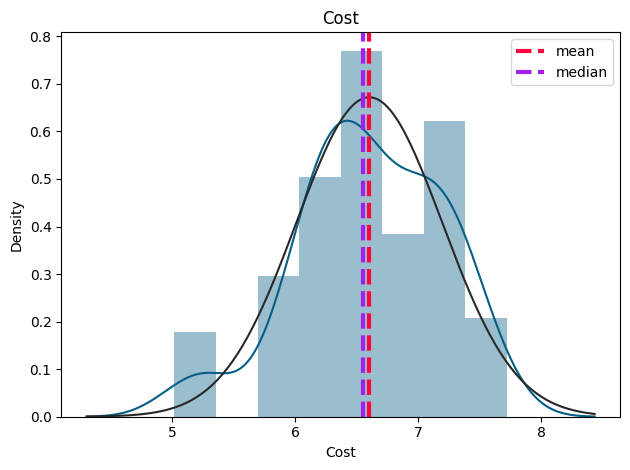

In [ ]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85', fit = norm);
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    #plt.legend(bbox_to_anchor = (1.0, 1), loc = 'up')
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

* Since I have applied capping method, it changes mean and median, hence trying to achieve normal distribution using log transformation which is a method for treating positive skewness.

Gaussian transformation generally used to convert data distribution into normal distribution.

### 6. Data Scaling

In [ ]:
# Scaling your data
cluster_dummy.sample(5)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
66,Aromas@11SIX,6.62,3.46,4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19,Pakwaan Grand,5.99,2.71,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,7.17,4.66,4,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10,Sardarji's Chaats & More,5.99,3.25,3,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
29,Hunger Maggi Point,5.30,3.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

* Here I have used standard scaler as those numerical columns where normally distributed.

### 7. Dimesionality Reduction

In [ ]:
# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])

PCA()

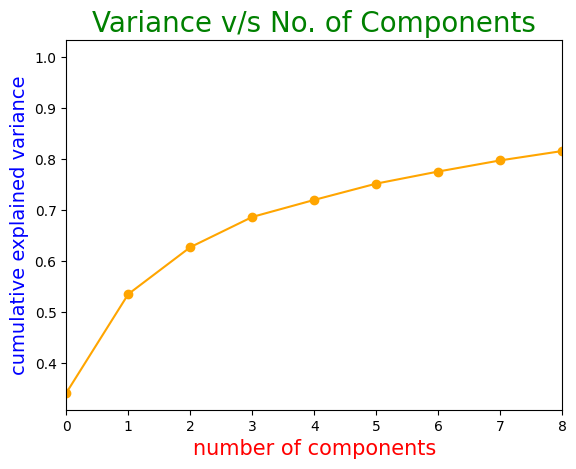

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [ ]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34148554 0.1936559  0.0919578 ]
Cumulative variance explained by 3 principal components: 62.71%


In [ ]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 3)


Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much of the relevant information as possible. It is a technique used to overcome the curse of dimensionality, which refers to the problem of increased computational complexity and decreased performance of machine learning models as the number of features increases.

There are two main types of dimensionality reduction techniques: feature selection and feature extraction.

Both feature selection and feature extraction can be used to reduce the dimensionality of the data and improve the performance of machine learning models. However, the choice of technique depends on the specific task, the data, and the computational resources available.

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, it is important to use dimensionality reduction techniques as dataset has 40 or more features. This is because, as the number of features increases, the computational cost of clustering algorithms also increases. In addition, high dimensionality can lead to the "curse of dimensionality", where the data becomes sparse and the clusters become harder to identify. Dimensionality reduction techniques such as PCA, t-SNE, or LLE can help reduce the number of features while maintaining the important information in the data, making it easier to cluster and interpret the results.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA as dimension reduction technique, because PCA (Principal Component Analysis) is a widely used dimensionality reduction technique because it is able to identify patterns in the data that are responsible for the most variation. These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other. By using the first few principal components, which account for the majority of the variation in the data, one can effectively reduce the dimensionality of the data while maintaining most of the important information.

Another advantage of PCA is that it is a linear technique, which means it can be applied to data that have a linear relationship between features. It is also easy to interpret the results as the principal components can be thought of as new, uncorrelated features. Additionally, PCA can be used for data visualization by projecting high-dimensional data onto a 2D or 3D space for easy visualization.


When PCA is applied before k-means, it is used to reduce the dimensionality of the data by transforming the original feature space into a new feature space of uncorrelated principal components. The k-means algorithm is then applied to the transformed data, resulting in clusters that are defined in the new feature space. The advantage of this approach is that it can help to remove noise and correlated features from the data, which can make the clustering results more interpretable. However, it also means that the clusters may be harder to interpret in the original feature space.

When PCA is applied after k-means, it is used to visualize the clusters in a lower-dimensional space. The k-means algorithm is applied to the original data, resulting in clusters that are defined in the original feature space. PCA is then used to project the data into a lower-dimensional space, making it easier to visualize and interpret the clusters. The advantage of this approach is that the clusters can be easily interpreted in the original feature space. However, it may not be as effective in removing noise and correlated features from the data.



### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [ ]:
sentiment_df.shape

(9961, 6)

In [ ]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 17327)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 17327)
Number transactions y_test dataset:  (1993,)


##### What data splitting ratio have you used and why?

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as: CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [ ]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns =
            {'index':'Sentiment','Sentiment':'Count'})

In [ ]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [ ]:
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

1.701654461621915

In [ ]:
!pip install matplotlib

import matplotlib.pyplot as plt

sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0.01,0.02])

plt.show()

ImportError: ignored

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Yes, there is imbalance in dataset with 60: 40 ratio, where 60 is the majaority class and 40 is the minority class. Even the CIR score suggest that majority class is 1.73 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., **not required** to treat class imabalance.

## ***7. ML Model Implementation***

### ML Model - 1 Clustering

####KMeans Clustering

K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

**ELBOW METHOD**

> This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.

**SILHOUETTE METHOD**

> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [ ]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78d81920e170>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

For n_clusters = 2 average silhouette_score is : 0.31357491715917435
For n_clusters = 3 average silhouette_score is : 0.2974211971806105
For n_clusters = 4 average silhouette_score is : 0.31274400128254354
For n_clusters = 5 average silhouette_score is : 0.30244427842780736
For n_clusters = 6 average silhouette_score is : 0.3167480002610183
For n_clusters = 7 average silhouette_score is : 0.30965474418889105
For n_clusters = 8 average silhouette_score is : 0.29778072472714795
For n_clusters = 9 average silhouette_score is : 0.29957199850588145


In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
Restaurant,,,,
Owm Nom Nom,-0.44,-1.32,-0.04,4
The Indi Grill,-1.64,1.80,0.06,0


In [ ]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Shanghai Chef 2,6.69,3.06,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,4
Olive Garden,6.55,3.76,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Royal Spicy Restaurant,700.00,3.74,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
The Chocolate Room,600.00,2.83,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.00,4.28,6,4
1,Paradise,"Biryani, North Indian, Chinese",800.00,4.70,3,0
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.00,4.66,4,0
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.00,3.21,5,4
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.00,4.34,5,0


In [ ]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,label,Total_Restaurant
4,1,13
3,2,14
2,0,18
1,4,25
0,3,30


In [ ]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
6,eat.fit,Continental,500.00,3.20,4,4
7,Shah Ghouse Spl Shawarma,Lebanese,300.00,3.43,1,1
73,Driven Cafe,Beverages,600.00,3.75,3,3
21,Jonathan's Kitchen - Holiday Inn Express & Suites,Japanese,1900.00,3.54,5,4
51,Hitech Bawarchi Food Zone,North Indian,500.00,3.05,3,2


In [ ]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 4 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'Healthy Food' 'American' 'Japanese'
 'Italian' 'Salad' 'Sushi' 'Mexican' 'Bakery' 'Mughlai' 'Juices' 'Andhra'
 'Hyderabadi' 'Spanish' 'Finger Food' 'Thai' 'Indonesian' 'Asian' 'Momos'
 'Desserts' 'Cafe' 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Continental' 'Seafood' 'Goan' 'Kebab' 'BBQ' 'European' 'American'
 'Italian' 'South Indian' 'Modern Indian' 'Sushi'] 

Cuisine List for Cluster : 1 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Pizza' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 2 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mughlai' 'South Indian' 'Desserts' 'Kebab' 'Cafe'] 

Cuisine List for Cluster : 3 

['Continental' 'American' 'Chinese' 'North Indian' 'Itali

####Agglomerative Hierarchical Clustering

Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

**Agglomerative hierarchical clustering**
> The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This hierarchy of clusters is represented in the form of the dendrogram.

**Dendrogram in Hierarchical clustering**

> The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [ ]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.29566419533238897
For n_clusters = 3, silhouette score is 0.2252839885668055
For n_clusters = 4, silhouette score is 0.20865729675680544
For n_clusters = 5, silhouette score is 0.246652459030282
For n_clusters = 6, silhouette score is 0.27119012773344175
For n_clusters = 7, silhouette score is 0.2686110893537919
For n_clusters = 8, silhouette score is 0.2815077022408657
For n_clusters = 9, silhouette score is 0.288036427814913
For n_clusters = 10, silhouette score is 0.2885450432372219
For n_clusters = 11, silhouette score is 0.29952838233213464
For n_clusters = 12, silhouette score is 0.31428857933967697
For n_clusters = 13, silhouette score is 0.3158360423442036
For n_clusters = 14, silhouette score is 0.3273629599939925
For n_clusters = 15, silhouette score is 0.33655269068108956


In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

Silhouette Coefficient: 0.247
davies_bouldin_score 1.151


In [ ]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc

In [ ]:
clustering_result.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label,label_hr
20,13 Dhaba,North Indian,450.00,3.48,1,1,3
14,AB's - Absolute Barbecues,"European, Mediterranean, North Indian",1500.00,4.88,3,0,0
22,B-Dubs,American,1600.00,4.81,1,0,0
54,Asian Meal Box,Asian,200.00,2.58,1,1,3
61,Prism Club & Kitchen,"Kebab, Continental, Italian, North Indian",1200.00,4.21,4,0,0


⚡ **K-means** and **hierarchical clustering** are two different methods for grouping data points into clusters. K-means is a centroid-based method, where each cluster is defined by the mean of the data points assigned to it. Hierarchical clustering, on the other hand, is a linkage-based method, where clusters are defined by the similarity of data points. Because these methods use different criteria to define clusters, the labels they assign to data points can be different. Additionally, the number of clusters and initialization of the algorithm can also affect the outcome, which can cause the labels to differ.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**KMeans Clustering**
> I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 6 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.

**Agglomerative Hierarchical Clustering**
> I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 6 and then vizualized the clusters and the datapoints within it.

#### 2. Cross- Validation & Hyperparameter Tuning


---

**Not required**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Sentiment Analysis

####Unsupervised Sentiment Analysis

**LDA**

In [ ]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


In [ ]:
#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [ ]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [ ]:
#using pyldavis to visualise
import pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
# ploting the clusters top 30 terms
#lda_pyLDAvis = pyLDAvis.prepare(vocab=lda, X, vectorizer, mds='tsne')
lda_pyLDAvis = pyLDAvis.prepare(
    topic_term_dists=lda,  # Replace 'lda' with your topic-term distribution matrix
    doc_topic_dists=None,  # If you have document-topic distributions, provide them here
    doc_lengths=None,      # If you have document lengths, provide them here
    term_frequency=None,   # If you have term frequencies, provide them here
    vocab=None,             # If you have a list of terms, provide them here
    mds='tsne'             # Specify your desired MDS method
)


#lda_pyLDAvis = pyLDAvis.prepare(X, vocab=lda, vectorizer=vectorizer, mds='tsne', doc_topic_dists=None, doc_lengths=None, term_frequency=None)

lda_pyLDAvis


TypeError: ignored

In [ ]:
#creating copy to store predicted sentiments
review_sentiment_prediction = review[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.00,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.00,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.00,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.00,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.00,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [ ]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

AttributeError: ignored

🗒argmax(axis=1) returns the index of the topic that has the highest probability for each sample, it finds the topic that has the highest probability of describing each sample in the dataset

In [ ]:
#worcloud
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

In [ ]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] ==
        sentiment]['Rating'].value_counts())
  print('='*120)

* LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.

 So, the predicted topic is not a definite answer, therfore experimenting with different techniques like using supervised algorithm and combining the results to make a more accurate sentiment labeling.





####Supervised Sentiment Analysis

* Combining supervised learning to know better about sentiments.

In [ ]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

**Logistic Regression**

In [ ]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

**XgBoost**

In [ ]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Logistic Regression**

In [ ]:
# Visualizing evaluation Metric Score chart for logistic regression
# printing result
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 580 instances are labeled as True Positive (correctly predicted as positive)
* 183 instances are labeled as False Positive (incorrectly predicted as positive)
* 1148 instances are labeled as True Negative (correctly predicted as negative)
* 82 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

In [ ]:
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 445 instances are labeled as True Positive (correctly predicted as positive)
* 318 instances are labeled as False Positive (incorrectly predicted as positive)
* 1153 instances are labeled as True Negative (correctly predicted as negative)
* 77 instances are labeled as False Negative (incorrectly predicted as negative)

#### 2. Cross- Validation & Hyperparameter Tuning

**Logistic Regression**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]}
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

In [ ]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 443 instances are labeled as True Positive (correctly predicted as positive)
* 320 instances are labeled as False Positive (incorrectly predicted as positive)
* 1189 instances are labeled as True Negative (correctly predicted as negative)
* 41 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

In [ ]:
# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 566 instances are labeled as True Positive (correctly predicted as positive)
* 197 instances are labeled as False Positive (incorrectly predicted as positive)
* 1100 instances are labeled as True Negative (correctly predicted as negative)
* 130 instances are labeled as False Negative (incorrectly predicted as negative)

In [ ]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Overall for XgBoost Classifier there is a improvement i.e., it changes from

* Metric    ⏸    Score
---------      --------
* ROC AUC   - 0.760311
* Precision -0.783821
* Recall    -0.937398
* F1        -0.853758
* Accuracy  -0.801806


to this ▶

* Metric      ⏸ Score
---------     --------
* ROC AUC   -0.818059
* Precision -0.848111
* Recall    -0.894309
* F1        -0.870598
* Accuracy  -0.835926
  

and after tunning
* 566 instances are labeled as True Positive (correctly predicted as positive)
* 197 instances are labeled as False Positive (incorrectly predicted as positive)
* 1100 instances are labeled as True Negative (correctly predicted as negative)
* 130 instances are labeled as False Negative (incorrectly predicted as negative)

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

Precision: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

The XgBoost Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3 Recommendation System

####**Content-Based Filtering**

#####Recommendation based on user profile and restaurant genre

In [ ]:
#creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

In [ ]:
#shape
restaurant_df.shape

In [ ]:
#restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

In [ ]:
#matrix shape
rest_matrix.shape

In [ ]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

In [ ]:
#shape
user_df.shape

In [ ]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()

In [ ]:
#shape
user_rating.shape

In [ ]:
#iterating over user rating df such that it end up making an array which had same shape as restaurant df
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# creating an empty user preference vector for each user
user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))),
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

#reset index
user_preference_vector = user_preference_vector.reset_index()

In [ ]:
#getting output
user_preference_vector.sample(5)

In [ ]:
#using dot multiplication to find score or weight for each reviewer
result_df = pd.DataFrame(columns = rest_genre.columns)
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1,-1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    result_df = result_df.append(pd.DataFrame(dot_product, columns = rest_genre.columns, index = [row['Reviewer']]))

result_df = result_df.reset_index().rename(columns ={'index':'Reviewer'})

In [ ]:
#getting output
result_df[:5]

In [ ]:
#creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

#taking 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

In [ ]:
#creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

In [ ]:
#test user profile
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile

In [ ]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

In [ ]:
#let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

In [ ]:
#getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)

In [ ]:
#getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)

In [ ]:
#getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
#getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

In [ ]:
#recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
score

In [ ]:
#@title Alternate way instead of dot multiplication
# #iterating over user rating df such that it end up making an array which had same shape as restaurant df
# user_rated_restaurants = {}
# for index, row in user_rating.iterrows():
#     user_rated_restaurants[row['Reviewer']] = {}
#     for i in range(len(row['Rated_Restaurant'])):
#         user_rated_restaurants[row['Reviewer']][row['Rated_Restaurant'][i][
#             'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# # creating an empty user preference vector for each user
# user_preference_vectors = {}

# # filling in the user's ratings for the restaurant_df they have rated
# for user in user_rated_restaurants:
#     user_preference_vectors[user] = np.zeros(len(restaurant_df.columns)-1)
#     for index, row in restaurant_df.iterrows():
#         if row['Restaurant'] in user_rated_restaurants[user]:
#             rating = user_rated_restaurants[user][row['Restaurant']]
#             user_preference_vectors[user] = user_preference_vectors[user] + (row.values[1:] * rating)
#         else:
#             user_preference_vectors[user] = user_preference_vectors[user]+(row.values[1:] * 0)

# Output the User preference Vector
# user_preference_vectors_list = list(user_preference_vectors.values())

In [ ]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
# score_threshold = 20.0
res_dict = {}

In [ ]:
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values


        # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values

        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])

    return users, restaurant, scores

In [ ]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

In [ ]:
#most recommended restaurant
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values(
                            'User', ascending = False)
recom_rest[:5]

In [ ]:
#least recommended restaurant
recom_rest[-5:]

In [ ]:
# grouping the data by the 'user' column
grouped_data = res_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

In [ ]:
#creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

#top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

In [ ]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

#####Recommendation based on Restaurant Similarity on Reviews

⚡ Calculating similarity based recommendations using reviews can be a valid approach, but it is important to ensure that the reviews used are reliable and unbiased, and that the similarity calculation algorithm is appropriate for the task.

Reviews can provide valuable information about the characteristics and quality of products or services, and this information can be used to identify similar items.

In [ ]:
#bag of word with doc index as these index will be used for finding similarity later
bows_df.sample(5)

In [ ]:
#using extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df.head()

In [ ]:
#Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review.sample(5)

In [ ]:
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest_bow[:10]

In [ ]:
#converting bow to horizontal format using pivot
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'],
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

In [ ]:
#using union set to compare two restaurant set of tokens
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # append the two token sets vertically
    join = base.append(compare)
    # pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',
              aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    # assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

In [ ]:
#creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']

In [ ]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

In [ ]:
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#creating function to calculate cosine similarity such that matrix can be made for each restaurant similarity

# Get the list of all restaurant
all_restaurant = rest_review['Restaurant'].unique()

# Initialize the dataframe to store the similarities
df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

# Iterate over the rows and columns of the dataframe
for i in all_restaurant:
    for j in all_restaurant:
        # Get the BoW representation of the current row and column restaurant
        #creating two test restaurant
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]
        bow_vectors = pivot_two_bows(rest1, rest2)
        # Calculate the cosine similarity between the two restaurant' BoW representations
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        # Assign the similarity score to the corresponding cell of the dataframe
        df_similarities.at[i, j] = sim

In [ ]:
# Now df_similarities has the restaurant as rows and columns with cosine similarity as values
df_similarities

In [ ]:
#creating function for mapping
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [ ]:
#two test subject
rest1 = rest_review[rest_review['Restaurant'] == "Beyond Flavours"]
rest2 = rest_review[rest_review['Restaurant'] == "Paradise"]

In [ ]:
#with restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

In [ ]:
#locating in the similarti df
sim_matrix = df_similarities.to_numpy()

#similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim

These two restaurant are quite similar to each other in respect to reviews i.e., showing 60% similarity.

In [ ]:
#function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]

                # Find the similarity value from the sim_matrix
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim

    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [ ]:
#function to calculate recommendation for all Reviewer
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

In [ ]:
#storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

In [ ]:
#getting the output
res_sim_df.sample(10)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

Content-based filtering is a technique used in recommendation systems to recommend items to users based on their past preferences or interactions with items. It works by analyzing the attributes of the items and user preferences, and recommending items that have similar attributes.

In content-based filtering, a user profile is created, which includes information about the user's preferences, such as the genres of restaurant they like, the types of books they read, etc. When a user wants to see recommendations, the system looks at the attributes of the items and compares them to the user's profile. Items that have attributes that match the user's preferences are recommended.

For example, in a restaurant recommendation system, a user's profile may include information about the genres of restaurant they like. If a user likes chinese or italian or indian restaurant, the system will recommend other chinese or italian or indian restaurant to them.

Content-based filtering can also be used to recommend items to new users who have not yet interacted with the system. In this case, the system will recommend items based on their attributes, rather than on the user's past preferences.

Content-based filtering can be used in conjunction with other techniques, such as collaborative filtering, to improve the accuracy of recommendations.

The machine learning model used for content-based filtering can vary depending on the type of data and attributes of the items. Some models used in content-based filtering include:

Cosine similarity: This is a measure of similarity between two vectors, which can be used to compare the attributes of items. Cosine similarity ranges between -1 and 1, where 1 means the vectors are identical and -1 means they are completely dissimilar.

Nearest Neighbors: This algorithm finds the k-nearest items to a given item based on their attributes. It is often used in recommendation systems to recommend items similar to the ones a user has interacted with in the past.

Vector Space Model: This algorithm represents items as vectors in a multi-dimensional space, where the dimensions represent the attributes of the items. Similarity between items is then calculated based on the distance between their vectors in this space.

#### 2. Cross- Validation & Hyperparameter Tuning

---
Not required for this model


In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For sentiment analysis, evaluation metrics used were precision, recall, F1-score, and accuracy.

* Precision measures the proportion of true positive predictions among all positive predictions. It is a good metric to use when the cost of false positives is high.
* Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances. It is a good metric to use when the cost of false negatives is high.
* F1-score is the harmonic mean of precision and recall, and is a good overall measure of a classifier's performance.
* Accuracy is the proportion of correctly classified instances among all instances.

The specific evaluation metric to use will depend on the specific use case and the relative costs of false positives and false negatives. For a positive business impact, **F1-score** can be considered as it balances the precision and recall to give an overall performance measure.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized.

* XGBoost is highly regularized, which helps to prevent overfitting, making it more robust to unseen data. As a supervised learning algorithm, XGBoost can be trained on labeled data to predict sentiment labels.

* XGBoost's ensemble nature can help to improve the performance of sentiment analysis by combining the predictions of multiple models.

* XGBoost's regularization can help to prevent overfitting and make the model more robust to unseen data, which is important in sentiment analysis where the model needs to generalize to new data.

* XGBoost's speed and efficiency can be beneficial in sentiment analysis, where large datasets are common and the model needs to make predictions quickly.

* XGBoost's built-in feature selection mechanism can be used to automatically select the most important features in a dataset, which can be useful in sentiment analysis where the data is high dimensional and it is important to focus on the most relevant features.

* XGBoost's gradient-boosted decision trees algorithm can be highly effective in sentiment analysis as it can learn complex relationships between features and sentiment labels.

XGBoost's ensemble nature, regularization, speed, feature selection, and gradient-boosted decision tree algorithm make it a powerful tool for sentiment analysis.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Get shap values
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

To better understand this, let’s dive into our first SHAP plot. Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.

Looking at the x-axis, we can see the base value is E[f(x)] = 0.584. The ending value is f(x) = -0.382. The SHAP values are all the values in between.

There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases rest will compress. One can see it start at the same base value of 0.5839.

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

* X_test which was originally the text data, which was converted into numerical feature using different preprocessing steps. Here, with all those shap model we can see some feature are very much important during prediction and these feature have seeinlgy weird name because the feature is likely a specific word or phrase in the text data that the model has learned is important for determining the sentiment.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# import joblib

# Save the model to a file
# joblib.dump(model, 'model.joblib')

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Load the File and predict unseen data.
# Load the model from the file
# model = joblib.load('model.joblib')

# Use the model to make predictions
# predictions = model.predict(data)

In [ ]:
#@title Flask code
# from flask import Flask, request, jsonify
# import pickle

# app = Flask(__name__)

# # Load the pre-trained model
# model = pickle.load(open('sentiment_model.pkl', 'rb'))

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get the text from the request
#     text = request.json['text']

#     # Use the model to predict the sentiment
#     prediction = model.predict([text])[0]

#     # Return the prediction as a JSON response
#     return jsonify({'sentiment': prediction})

# if __name__ == '__main__':
#     app.run(debug=True)


### ***MODEL 🎰 ! is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group customers based on their review text, and it was found that the customers were grouped into two clusters: positive and negative. This provided a general understanding of customer satisfaction levels, with the positive cluster indicating the highest level of satisfaction and the negative cluster indicating the lowest level of satisfaction.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved.

Other important discoveries during analysis are -
* AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

* Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

* North Indian food followed by chinese are best or indeemand food as sold by most of the restaurants.

* Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

* Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

* restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

Some recommendation based on the analysis ▶
* Based on negative reviews like some focused on issues with delivery time or food quality, the company should prioritize addressing these issues to imporve customer satisfaction.

* Based on the clustering, or user interaction customer should be given recommendations.

* Also use the clustering results to target specific customer segments and tailor marketing and promotional efforts accordingly.

### ***Hurrah! I have successfully completed my Machine Learning Capstone Project !!!🎯🏆***